# 09 - Statystyki opisowe

# Skale pomiarowe w statystyce

Skale pomiarowe określają, jakie operacje matematyczne i statystyczne można wykonywać na danych. Wyróżniamy cztery podstawowe typy skal:

1. Skala **nominalna** (nazewnicza)
- Dane służą tylko do nazwania lub kategoryzacji.
- Nie da się ustalić porządku między wartościami.
- Możliwe operacje: zliczanie, tryb, analiza częstości.

Przykłady:
- Typ Pokémona (type_1): "fire", "water", "grass" itp.
- Gatunek, płeć, kolory.

In [120]:
import pandas as pd
df_pokemon = pd.read_csv("data/pokemon.csv")
df_pokemon["Type 1"].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

2. Skala **porządkowa** 
- Dane dają się uporządkować, ale odległości między nimi nie są znane.
- Możliwe operacje: mediana, kwantyle, testy rangowe (np. Spearmana).

Przykłady:
- Poziom siły: "niski", "średni", "wysoki"
- Oceny jakości: "słaby", "dobry", "bardzo dobry"

In [128]:
import seaborn as sns

titanic = sns.load_dataset("titanic")

print(titanic["class"].unique())

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']


3. Skala **przedziałowa** (interwałowa)
- Dane są liczbowe, z równymi odstępami, ale brak zera absolutnego.
- Można obliczać różnice, średnią, odchylenie standardowe.
- Brak sensu dla ilorazów (np. „dwa razy więcej”).

Przykłady:
- Temperatura w °C (ale nie w Kelwinach!)

4. Skala **ilorazowa** (stosunkowa)
- Dane liczbowe, mają zero absolutne.
- Można wykonywać wszystkie działania matematyczne, także dzielenie.

Przykłady:
- Wzrost, waga, liczba punktów ataku Pokémona (attack), HP, speed.


In [131]:
df_pokemon[["HP", "Attack", "Speed"]].describe()

,Attack,Speed
count,800.000000,800.000000
mean,79.001250,68.277500
std,32.457366,29.060474
min,5.000000,5.000000
25%,55.000000,45.000000
50%,75.000000,65.000000
75%,100.000000,90.000000
max,190.000000,180.000000


### Tabela: Skale pomiarowe w statystyce

| Skala          | Przykład                           | Czy można porządkować? | Równe odstępy? | Zero absolutne? | Przykładowe operacje statystyczne        |
|----------------|-------------------------------------|--------------------------|----------------|------------------|------------------------------------------|
| **Nominalna**  | Typ Pokémona (`fire`, `water` itd.)| ❌                       | ❌             | ❌               | Tryb, zliczenia, analiza częstości       |
| **Porządkowa** | Klasa biletu (`First`, `Second`, `Third`) | ✅                       | ❌             | ❌               | Mediana, kwantyle, testy rangowe         |
| **Przedziałowa** | Temperatura w °C                  | ✅                       | ✅             | ❌               | Średnia, odchylenie standardowe          |
| **Ilorazowa**  | HP, atak, wzrost                   | ✅                       | ✅             | ✅               | Wszystkie operacje matematyczne/statystyki |

**Wniosek**: Rodzaj skali wpływa na wybór metod statystycznych – np. test korelacji Pearsona wymaga danych ilorazowych lub przedziałowych, a test Chi² – danych nominalnych.

![title](img/skale.png)

### Quiz: Skale pomiarowe w statystyce

Odpowiedz na poniższe pytania, wybierając **jedną poprawną odpowiedź**. Rozwiązania znajdziesz na końcu.

---

#### 1. Która ze skal **umożliwia porządkowanie danych**, ale **nie ma równych odstępów**?
- A) Nominalna  
- B) Porządkowa  
- C) Przedziałowa  
- D) Ilorazowa  

---

#### 2. Przykładem zmiennej w **skali nominalnej** jest:
- A) Temperatura w °C  
- B) Wzrost  
- C) Typ Pokémona (`fire`, `grass`, `water`)  
- D) Poziom zadowolenia (`niski`, `średni`, `wysoki`)  

---

#### 3. Która skala **nie ma zera absolutnego**, ale posiada **równe odstępy**?
- A) Ilorazowa  
- B) Porządkowa  
- C) Przedziałowa  
- D) Nominalna  

---

#### 4. Jakie operacje są **dozwolone** na zmiennych **w skali porządkowej**?
- A) Średnia i odchylenie standardowe  
- B) Tryb i korelacja Pearsona  
- C) Mediana i testy rangowe  
- D) Ilorazy i logarytmy  

---

#### 5. Zmienna `"class"` w zbiorze Titanic (`First`, `Second`, `Third`) to przykład:
- A) Skali nominalnej  
- B) Skali ilorazowej  
- C) Skali przedziałowej  
- D) Skali porządkowej  

---

# Statystyka opisowa

**Statystyka opisowa** zajmuje się opisem rozkładu danych w próbie. Statystyki opisowe dają nam podstawowe miary podsumowujące dotyczące zbioru danych. Miary podsumowujące obejmują miary tendencji centralnej (średnia, mediana i tryb) oraz miary zmienności (wariancja, odchylenie standardowe, wartości minimalne/maksymalne, IQR (zakres międzykwartylowy), skośność i kurtoza).

## W tym rozdziale

Teraz zajmiemy się **opisywaniem** naszych danych - jak również **podstawami statystyki**.

Istnieje wiele sposobów na *opisanie* rozkładu. 

Tutaj omówimy:
- Miary **tendencji centralnej**: jaka jest typowa wartość w tym rozkładzie?
- Miary **zmienności**: jak bardzo wartości różnią się od siebie?  
- Miary **skośności**: jak silna jest asymetria rozkładu?
- Miary **kurtozy**: jaka jest intensywność występowania wartości skrajnych?
- Pomiar zależności między rozkładami za pomocą **korelacji liniowych, rangowych**.
- Pomiar zależności między zmiennymi jakościowymi za pomocą **kontyngencji**.

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

In [46]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Tendencja centralna

**Tendencja centralna** odnosi się do „typowej wartości” w rozkładzie.

**Tendencja centralna** oznacza wartość centralną, która opisuje rozkład zmiennej. Może być również nazywana środkiem lub lokalizacją rozkładu. Najpopularniejszymi miarami tendencji centralnej są **średnia**, **mediana** i **moda**. Najpopularniejszą miarą tendencji centralnej jest **średnia**. W przypadku rozkładu skośnego lub gdy istnieje obawa o wartości odstające, preferowana może być **mediana**. Mediana jest więc bardziej wiarygodną miarą niż średnia.

Istnieje wiele sposobów *mierzenia* tego, co jest „typowe” - przeciętne:

- Średnia arytmetyczna
- Mediana (wartość środkowa)
- Moda (dominanta)

### Dlaczego jest to przydatne?

- Zbiór danych może zawierać *wiele* obserwacji.  
   - Na przykład, $N = 5000$ odpowiedzi ankietowych dotyczących `wysokości`.  
- Jednym ze sposobów „opisania” tego rozkładu jest jego **wizualizacja**.  
- Ale pomocne jest również zredukowanie tego rozkładu do *pojedynczej liczby*.

Jest to z konieczności **uproszczenie** naszego zbioru danych!

### *Średnia arytmetyczna*

> **Średnia arytmetyczna** jest zdefiniowana jako `suma` wszystkich wartości w rozkładzie, podzielona przez liczbę obserwacji w tym rozkładzie.

In [5]:
liczby = [1, 2, 3, 4]
### obliczanie na piechotę...
sum(liczby)/len(liczby)

2.5

- Najpopularniejszą miarą tendencji centralnej jest średnia.
- Średnia jest również znana jako średnia prosta.
- Oznaczana jest grecką literą $µ$ dla populacji i $\bar{x}$ dla próbki.
- Możemy znaleźć średnią liczby elementów, dodając wszystkie elementy w zbiorze danych, a następnie dzieląc przez liczbę elementów w zbiorze danych.
- Jest to najpopularniejsza miara tendencji centralnej, ale ma ona pewną wadę.
- Na średnią wpływa obecność wartości odstających.
- Sama średnia nie jest więc wystarczająca do podejmowania decyzji biznesowych.

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$



#### `numpy.mean`

Pakiet `numpy` posiada funkcję obliczającą `średnią` na `liście` lub `numpy.ndarray`.

In [7]:
np.mean(liczby)

np.float64(2.5)

#### Obliczanie `średniej` kolumny `pandas`

Jeśli pracujemy z `DataFrame`, możemy obliczyć `średnią` konkretnych kolumn.

In [8]:
df_gapminder = pd.read_csv("data/viz/gapminder_full.csv")
df_gapminder.head(2)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030


In [9]:
df_gapminder['life_exp'].mean()

np.float64(59.474439366197174)

#### Twoja kolej

Jak obliczyć „średnią” kolumny „gdp_cap”?

In [10]:
### Twój kod tutaj

#### *Średnia* i skośność

> **Skośność** oznacza, że istnieją wartości *wydłużające* jeden z "ogonów" rozkładu.

Spośród miar **tendencji centralnej**, „średnia” jest najbardziej zależna od kierunku skośności.

- Jak opisać poniższy **skos**?  
- Czy uważasz, że „średnia” byłaby wyższa czy niższa niż „mediana”?

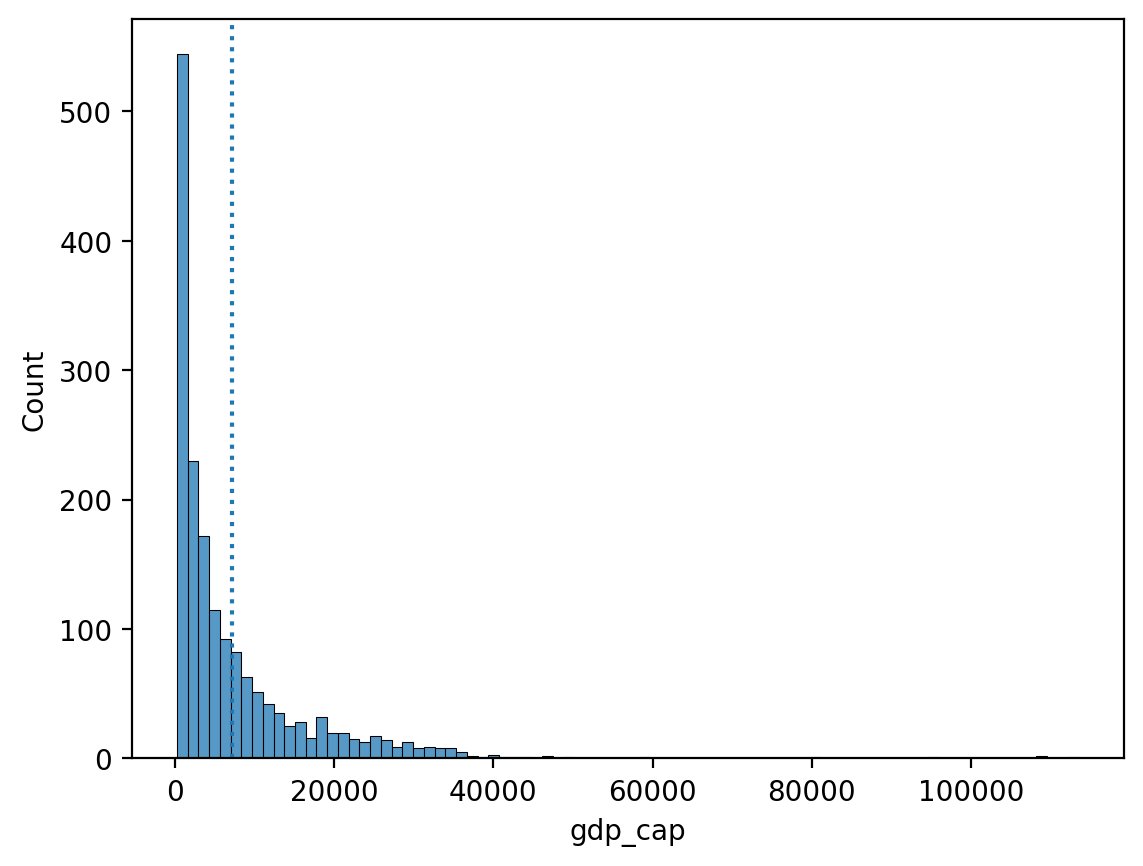

In [11]:
sns.histplot(data = df_gapminder, x = "gdp_cap")
plt.axvline(df_gapminder['gdp_cap'].mean(), linestyle = "dotted");

#### Twoja kolej

Czy można obliczyć średnią kolumny „kontynent”? Dlaczego lub dlaczego nie?

In [12]:
### Twój kod tutaj

#### Twoja kolej

- Odejmij każdą obserwację w `liczbach` od `średniej` tej `listy`.  
- Następnie oblicz **sumę** tych odchyleń od `średniej`.

Jaka jest ich suma?

In [13]:
liczby = np.array([1, 2, 3, 4])
### Twój kod tutaj

#### Podsumowanie pierwszej części

- Średnia jest jedną z najbardziej powszechnych miar tendencji centralnej.  
- Może być używana tylko dla **ciągłych** danych interwałowych/ratio.  
- **Suma odchyleń** od średniej jest równa `0`. 
- Na „średnią” największy wpływ ma **skośność** i **wartości odstające**.

### *Mediana*

> *Medianę* oblicza się sortując wszystkie wartości od najmniejszej do największej, a następnie znajdując wartość pośrodku.

- Mediana to liczba, która dzieli zbiór danych na dwie równe połowy.
- Aby obliczyć medianę, musimy uporządkować nasz zbiór danych składający się z n liczb w kolejności rosnącej.
- Mediana tego zbioru danych to liczba na pozycji (n+1)/2, jeśli n jest nieparzyste.
- Jeśli n jest parzyste, mediana jest średnią z (n/2)trzeciej liczby i (n+2)/2 trzeciej liczby.
- Mediana jest odporna na wartości odstające.
- Tak więc, w przypadku rozkładu skośnego lub gdy istnieje obawa o wartości odstające, preferowana może być mediana.

In [15]:
df_gapminder['gdp_cap'].median()

np.float64(3531.8469885)

#### Porównanie `mediany` i `średniej`

Kierunek pochylenia ma mniejszy wpływ na `medianę`.

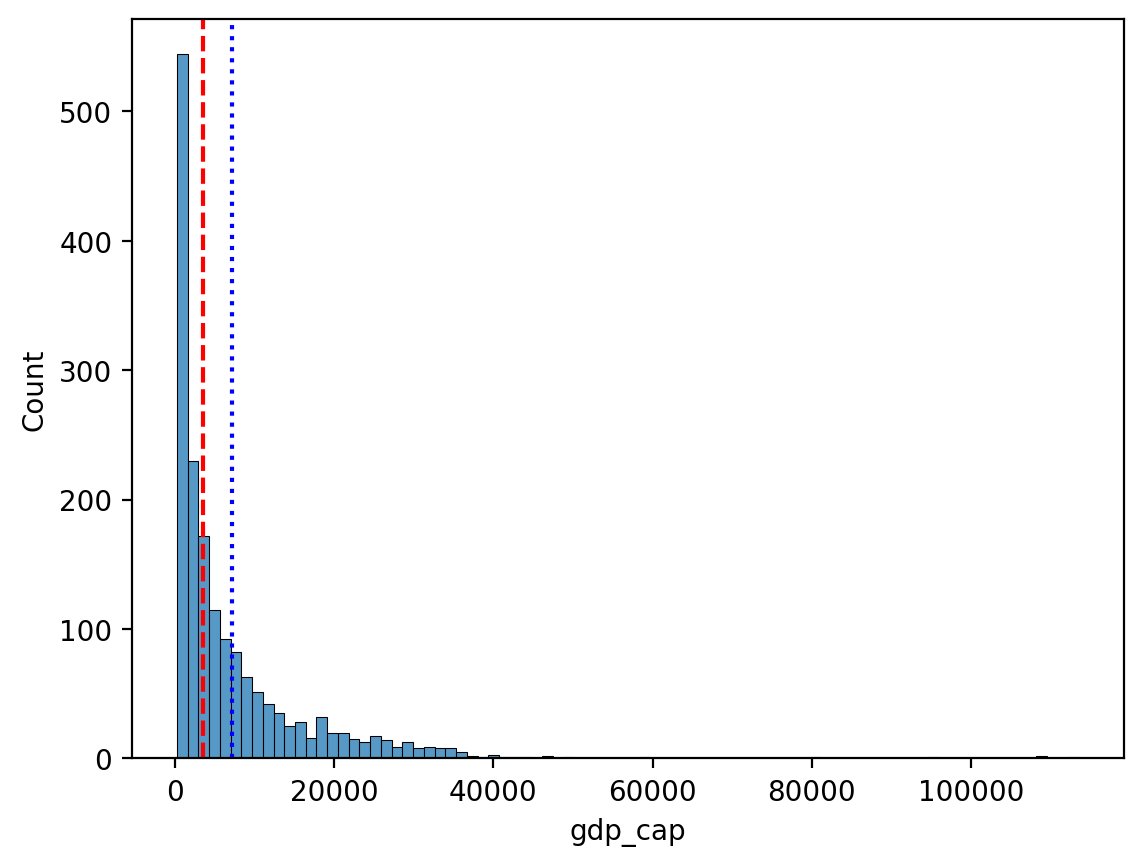

In [16]:
sns.histplot(data = df_gapminder, x = "gdp_cap")
plt.axvline(df_gapminder['gdp_cap'].mean(), linestyle = "dotted", color = "blue")
plt.axvline(df_gapminder['gdp_cap'].median(), linestyle = "dashed", color = "red");

#### Twoja kolej

Czy można obliczyć medianę kolumny „kontynent”? Dlaczego lub dlaczego nie?

In [17]:
### Twoja odpowiedź tutaj

### *Moda*

> **Moda** jest najczęściej występującą wartością w zbiorze danych. 

W przeciwieństwie do `mediany` lub `średniej`, `moda` może być używana z **kategorycznymi** danymi.

In [94]:
df_pokemon = pd.read_csv("data/pokemon.csv")
df_pokemon['Type 1'].mode()

0    Water
Name: Type 1, dtype: object

#### `mode()` zwraca wiele wartości?

- Jeśli wiele wartości *wiąże się* dla najczęstszej, `mode()` zwróci je wszystkie.
- Dzieje się tak dlatego, że technicznie rzecz biorąc, rozkład może mieć wiele wartości najczęstszych - modalnych!

In [19]:
df_gapminder['gdp_cap'].mode()

0          241.165876
1          277.551859
2          298.846212
3          299.850319
4          312.188423
            ...      
1699     80894.883260
1700     95458.111760
1701    108382.352900
1702    109347.867000
1703    113523.132900
Name: gdp_cap, Length: 1704, dtype: float64

### Miary tendencji centralnej - podsumowanie

|Miara|Może być użyta dla:|Ograniczenia|
|-------|----------------|-----------|
|Średnia|Dane ciągłe|Wpływ na skośność i wartości odstające|
|Mediana|Dane ciągłe|Nie uwzględnia *wartości* wszystkich punktów danych w obliczeniach (tylko rangi)|
|Moda|Dane ciągłe i kategoryczne|Uwzględnia tylko *najczęstsze*; ignoruje inne wartości|

## Kwantyle

**Kwantyle** to statystyki opisowe - pozycyjne, które dzielą uporządkowany zbiór danych na równe części. Najczęściej spotykane kwantyle to:

- **Mediana** (kwantyl rzędu 0.5),
- **Kwartyle** (dzielą dane na 4 części),
- **Decyle** (na 10 części),
- **Percentyle** (na 100 części).

### Definicja

Kwantyl rzędu $q \in (0,1)$ to taka wartość $x_q$, że:

$$
P(X \leq x_q) = q
$$

Inaczej mówiąc: $q \cdot 100\% $ wartości w zbiorze danych jest mniejszych lub równych $x_q$.

### Wzór (dla uporządkowanego zbioru danych)

Dla próbki danych $x_1, x_2, \ldots, x_n$ uporządkowanej rosnąco, kwantyl rzędu $q$ wyznacza się jako:

1. Oblicz indeks pozycyjny:

$$
i = q \cdot (n + 1)
$$

2. Jeśli $i$ jest liczbą całkowitą, to kwantyl to $x_i$.

3. Jeśli $i$ nie jest całkowite, interpolujemy liniowo pomiędzy sąsiednimi wartościami:

$$
x_q = x_{\lfloor i \rfloor} + (i - \lfloor i \rfloor) \cdot (x_{\lceil i \rceil} - x_{\lfloor i \rfloor})
$$

**Uwaga:** W praktyce stosuje się różne metody wyznaczania kwantyli — biblioteki takie jak NumPy czy Pandas mają różne tryby (np. `method='linear'`, `method='midpoint'`).

### Przykład - obliczamy na piechotę

Dla danych:  
$
[3, 7, 8, 5, 12, 14, 21, 13, 18]
$

1. Porządkujemy dane rosnąco:

$
[3, 5, 7, 8, 12, 13, 14, 18, 21]
$

2. Mediana (kwantyl rzędu 0.5):

Liczba elementów $n = 9$, środkowy element to 5-ta wartość:

$
\text{Mediana} = x_5 = 12
$

3. Pierwszy kwartyl (Q1, kwantyl rzędu 0.25):

$
i = 0.25 \cdot (9 + 1) = 2.5
$

Interpolacja między $x_2 = 5$ i $x_3 = 7$:

$
Q_1 = 5 + 0.5 \cdot (7 - 5) = 6
$

4. Trzeci kwartyl (Q3, kwantyl rzędu 0.75):

$
i = 0.75 \cdot 10 = 7.5
$

Interpolacja między $x_7 = 14$ i $x_8 = 18$:

$
Q_3 = 14 + 0.5 \cdot (18 - 14) = 16
$

### Decyle

**Decyle** dzielą dane na 10 równych części. Przykładowo:

- **D1** to 10-ty percentyl (kwantyl rzędu 0.1),
- **D5** to mediana (0.5),
- **D9** to 90-ty percentyl (0.9).

Wzór taki sam jak dla ogólnych kwantyli, wystarczy użyć odpowiedniego $q$. Np. dla D3:

$
q = \frac{3}{10} = 0.3
$

### Percentyle

**Percentyle** dzielą dane na 100 równych części. Np.:

- **P25** = Q1,
- **P50** = mediana,
- **P75** = Q3,
- **P90** to wartość, poniżej której znajduje się 90% danych.

Dzięki percentylom możemy lepiej zrozumieć rozkład danych – np. w testach standardowych często wynik podaje się jako percentyl (np. "85 percentyl" oznacza, że ktoś osiągnął wynik lepszy niż 85% populacji).

---

### Kwantyle - podsumowanie

| Nazwa     | Symbol | Kwantyl \( q \) | Znaczenie                          |
|-----------|--------|------------------|-------------------------------------|
| Q1        | Q1     | 0.25             | 25% danych ≤ Q1                     |
| Mediana   | Q2     | 0.5              | 50% danych ≤ Mediana                |
| Q3        | Q3     | 0.75             | 75% danych ≤ Q3                     |
| Decyl 1   | D1     | 0.1              | 10% danych ≤ D1                     |
| Decyl 9   | D9     | 0.9              | 90% danych ≤ D9                     |
| Percentyl 95 | P95 | 0.95             | 95% danych ≤ P95                    |

---

### Przykład - obliczamy kwantyle

In [20]:
# Dane przykładowe
dane = [3, 7, 8, 5, 12, 14, 21, 13, 18]
dane_sorted = sorted(dane)
print("Posortowane dane:", dane_sorted)

Posortowane dane: [3, 5, 7, 8, 12, 13, 14, 18, 21]


In [22]:
# Konwersja na obiekt Pandas Series
s = pd.Series(dane)

# Kwartyle
q1 = s.quantile(0.25)
median = s.quantile(0.5)
q3 = s.quantile(0.75)

# Decyle
d1 = s.quantile(0.1)
d9 = s.quantile(0.9)

# Percentyle
p95 = s.quantile(0.95)

print("Kwantyle:")
print(f"Q1 (25%): {q1}")
print(f"Mediana (50%): {median}")
print(f"Q3 (75%): {q3}")
print("\nDecyle:")
print(f"D1 (10%): {d1}")
print(f"D9 (90%): {d9}")
print("\nPercentyle:")
print(f"P95 (95%): {p95}")

Kwantyle:
Q1 (25%): 7.0
Mediana (50%): 12.0
Q3 (75%): 14.0

Decyle:
D1 (10%): 4.6
D9 (90%): 18.6

Percentyle:
P95 (95%): 19.799999999999997


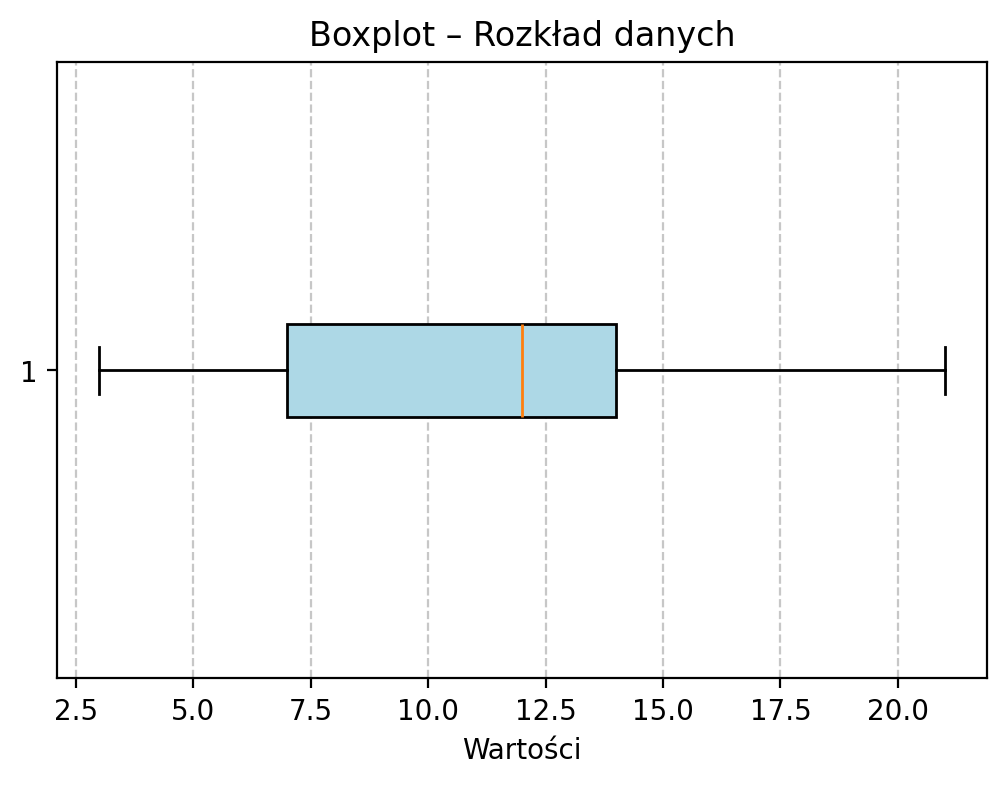

In [25]:
plt.figure(figsize=(6, 4))
plt.boxplot(dane, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'));
plt.title("Boxplot – Rozkład danych")
plt.xlabel("Wartości")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

### Twoja kolej!

Patrząc na w/w wyniki kwantyli oraz wykres pudełkowy postaraj się zinterpretować te miary. 

## Zmienność

> **Zmienność** (lub **rozproszenie**) odnosi się do stopnia, w jakim wartości w rozkładzie są *rozproszone*, tj. różnią się od siebie.

**Rozproszenie** jest wskaźnikiem tego, jak daleko od środka możemy znaleźć wartości danych. Najpopularniejszymi miarami rozproszenia są **wariancja**, **odchylenie standardowe** i **rozstęp międzykwartylowy (IQR)**. **Wariancja** jest standardową miarą rozrzutu. **Odchylenie standardowe** jest pierwiastkiem kwadratowym z wariancji. **Wariancja** i **odchylenie standardowe** to dwie użyteczne miary rozrzutu.

### `średnia` ukrywa wariancję

Oba rozkłady mają *tę samą* średnią, ale *różne* **odchylenia standardowe**.

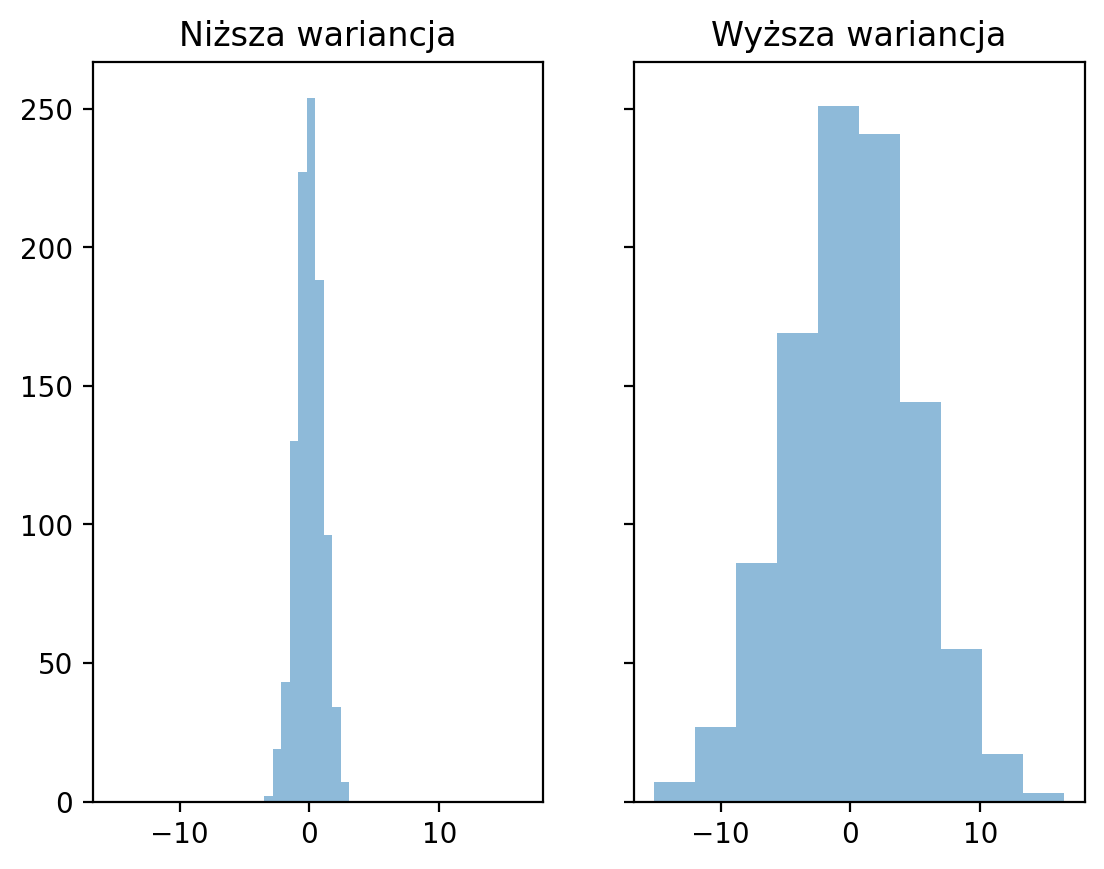

In [32]:
### Tworzymy rozkłady
d1 = np.random.normal(loc = 0, scale = 1, size = 1000)
d2 = np.random.normal(loc = 0, scale = 5, size = 1000)
### Wykresy
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True);
p1 = axes[0].hist(d1, alpha = .5)
p2 = axes[1].hist(d2, alpha = .5)
axes[0].set_title("Niższa wariancja");
axes[1].set_title("Wyższa wariancja");

### Wykrywanie zmienności

Istnieją co najmniej *trzy* główne podejścia do kwantyfikacji zmienności:

- **Zakres**: różnica między wartością „maksymalną” i „minimalną”. 
- **Zakres międzykwartylowy (IQR)**: Zakres środkowych 50% danych.  
- **Wariancja** i **Odchylenie standardowe**: typowa wartość, o jaką wyniki odbiegają od średniej.

### Zasięg

> **Zasięg** jest różnicą pomiędzy wartością `maksymalną` i `minimalną`.

Intuicyjne, ale uwzględnia tylko dwie wartości w całej dystrybucji.

In [33]:
d1.max() - d1.min()

np.float64(6.580628568373348)

In [34]:
d2.max() - d2.min()

np.float64(31.571899756007486)

### IQR

> **Zakres międzykwartylowy (IQR)** to różnica między wartością w 75% percentylu a wartością w 25% percentylu.

Koncentruje się na **środkowych 50%**, ale nadal uwzględnia tylko dwie wartości.

- IQR jest obliczany przy użyciu granic danych znajdujących się między 1. a 3. kwartylem. 
- Przedział międzykwartylowy (IQR) można obliczyć w następujący sposób: $IQR = Q3 - Q1$
- W ten sam sposób, w jaki mediana jest bardziej odporna niż średnia, IQR jest bardziej odporną miarą rozrzutu niż wariancja i odchylenie standardowe i dlatego powinien być preferowany w przypadku małych lub asymetrycznych rozkładów. 
- Jest to solidna miara rozrzutu.

In [35]:
## Obliczamy kwantyle - kwartyle Q1 oraz Q3
q3, q1 = np.percentile(d1, [75 ,25])
q3 - q1

np.float64(1.3316655702366968)

In [36]:
## Obliczamy kwantyle - kwartyle Q1 oraz Q3
q3, q1 = np.percentile(d2, [75 ,25])
q3 - q1

np.float64(6.309359612149275)

### Wariancja i odchylenie standardowe

**Wariancja** mierzy rozproszenie zestawu punktów danych wokół ich średniej wartości. Jest to średnia kwadratów poszczególnych odchyleń. Wariancja daje wyniki w oryginalnych jednostkach podniesionych do kwadratu.

$$
s^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

**Odchylenie standardowe (SD)** mierzy *typową wartość*, o jaką wyniki w rozkładzie odbiegają od średniej.

$$
s = \sqrt{s^2} = \sqrt{\frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

gdzie:
	•	$n$ – liczba elementów w próbie
	•	$\bar{x}$ – średnia arytmetyczna próby

O czym należy pamiętać:

- SD jest *pierwiastkiem kwadratowym* z [wariancji](https://en.wikipedia.org/wiki/Variance).  
- W rzeczywistości istnieją *dwie* miary SD:
 - SD populacji: gdy mierzysz całą populację zainteresowania (bardzo rzadko).  
   - SD próbki: gdy mierzysz *próbkę* (typowy przypadek); skupimy się na tym.

#### SD, objaśnione

- Najpierw oblicz sumę *odchyleń kwadratowych*.
   - Jakie jest całkowite odchylenie kwadratowe od „średniej”? 
- Następnie podziel przez `n - 1`: znormalizuj do liczby obserwacji.
   - Ile wynosi *średnie* kwadratowe odchylenie od „średniej”?
- Na koniec weź *pierwiastek kwadratowy*:
   - Jakie jest *średnie* odchylenie od „średniej”?

**Odchylenie standardowe** reprezentuje *typowe* lub „średnie” odchylenie od „średniej”.

#### Obliczanie SD w `pandas`

In [61]:
df_pokemon['Attack'].std()

np.float64(32.45736586949845)

In [38]:
df_pokemon['HP'].std()

np.float64(25.53466903233207)

#### Uwaga na `np.std`

- Domyślnie, `numpy.std` oblicza **odchylenie standardowe populacji**!  
- Należy zmodyfikować parametr `ddof`, aby obliczyć **próbkowe odchylenie standardowe**.

Jest to bardzo częsty błąd.

In [39]:
### SD populacji
d1.std()

np.float64(1.012275006518212)

In [40]:
### SD próby
d1.std(ddof = 1)

np.float64(1.0127815239412115)

### Współczynnik zmienności (CV)

- Współczynnik zmienności (CV) jest równy odchyleniu standardowemu podzielonemu przez średnią.
- Jest również znany jako „względne odchylenie standardowe”.

$$
CV = \frac{s}{\bar{x}} \cdot 100%
$$

In [47]:
X = [2, 4, 4, 4, 5, 5, 7, 9]
mean = np.mean(X)

# Wariancja i odchylenie standardowe z scipy (dla próby!)
var_sample = stats.tvar(X)      # wariancja próby
std_sample = stats.tstd(X)      # odchylenie standardowe próby

# Współczynnik zmienności (dla próby)
cv_sample = (std_sample / mean) * 100

print(f"Średnia: {mean}")
print(f"Wariancja próby (scipy): {var_sample}")
print(f"Odchylenie standardowe próby (scipy): {std_sample}")
print(f"Współczynnik zmienności (scipy): {cv_sample:.2f}%")

Średnia: 5.0
Wariancja próby (scipy): 4.571428571428571
Odchylenie standardowe próby (scipy): 2.138089935299395
Współczynnik zmienności (scipy): 42.76%


## Miary kształtu rozkładu

Teraz przyjrzymy się miarom kształtu rozkładu. Istnieją dwie miary statystyczne, które mogą nam powiedzieć o kształcie rozkładu. Są to **skośność** i **kurtoza**. Miary te mogą być wykorzystane do przekazania informacji o kształcie rozkładu zbioru danych.

## Skośność
- **Skośność** jest miarą symetrii rozkładu, a dokładniej jej braku. 
- Jest używana do określenia braku symetrii względem średniej zbioru danych. 
- Jest to charakterystyka odchylenia od średniej. 
- Służy do wskazania kształtu rozkładu danych.

Skośność to miara asymetrii rozkładu danych względem średniej. Mówi nam, czy dane są bardziej „rozciągnięte” w jedną ze stron.

Interpretacja:

- Skośność > 0 – prawostronna (dodatnia): długi ogon z prawej strony (większe wartości są bardziej rozproszone)
- Skośność < 0 – lewostronna (ujemna): długi ogon z lewej strony (mniejsze wartości są bardziej rozproszone)
- Skośność ≈ 0 – rozkład symetryczny (np. rozkład normalny)

Wzór (dla próby):

$$
A = \frac{n}{(n-1)(n-2)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3
$$

gdzie:
	•	$n$ – liczba obserwacji
	•	$\bar{x}$ – średnia próby
	•	$s$ – odchylenie standardowe próby

![title](img/skos.png)


#### Ujemna skośność

- W tym przypadku dane są przekrzywione lub przesunięte w lewo. 
- Przez przekrzywienie w lewo rozumiemy, że lewy ogon jest długi w stosunku do prawego ogona. 
- Wartości danych mogą rozciągać się dalej w lewo, ale koncentrują się po prawej stronie. 
- Mamy więc do czynienia z długim ogonem, a zniekształcenia są powodowane przez bardzo małe wartości, które ciągną średnią w dół i jest ona mniejsza niż mediana. 
- W tym przypadku mamy **Średnia < Mediana < Moda**
      

#### Zerowa skośność

- Oznacza to, że zbiór danych jest symetryczny. 
- Zbiór danych jest symetryczny, jeśli wygląda tak samo po lewej i prawej stronie punktu środkowego. 
- Zbiór danych ma kształt dzwonu lub jest symetryczny. 
- Idealnie symetryczny zestaw danych będzie miał skośność równą zero. 
- Tak więc rozkład normalny, który jest idealnie symetryczny, ma skośność równą 0. 
- W tym przypadku mamy **Średnia = Mediana = Moda**
      

#### Dodatnia skośność

- Zbiór danych jest przekrzywiony lub przesunięty w prawo. 
- Przez przekrzywienie w prawo rozumiemy, że prawy ogon jest długi w stosunku do lewego ogona. 
- Wartości danych są skoncentrowane po prawej stronie. 
- Istnieje długi ogon po prawej stronie, który jest spowodowany bardzo dużymi wartościami, które podciągają średnią w górę i jest ona większa niż mediana. 
- Mamy więc **Średnia > Mediana > Moda**

In [54]:
X = [2, 4, 4, 4, 5, 5, 7, 9]

# Obliczanie skośności
skewness = skew(X)
print(f"Skośność zbioru danych: {skewness:.4f}")


Skośność zbioru danych: 0.6562


### Twoja kolej

Postaraj się zinterpretować w/w wynik oraz obliczyć przykładowe wskaźniki skośności dla kilku grup pokemonów.

In [52]:
# Twój kod tutaj

## Kurtoza

W przeciwieństwie do tego, co podają niektóre podręczniki, kurtoza nie mierzy „spłaszczenia”, „szczytowości” rozkładu.

Kurtoza zależy od intensywności skrajnych wartości, więc mierzy to, co dzieje się w „ogonach” rozkładu, kształt „wierzchołka” nie ma żadnego znaczenia!


Kurtoza próby:

$$
\text{Kurtoza} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4
$$

$$
\text{Kurtoza znormalizowana} = \text{Kurtoza} - 3
$$

#### Zakres referencyjny dla kurtozy
- Standardem referencyjnym jest rozkład normalny, który ma kurtozę równą 3. 
- Często zamiast kurtozy prezentowana jest **eksces**, gdzie **eksces** to po prostu **kurtoza - 3**. 

#### Krzywa mezokurtyczna
- Rozkład normalny ma kurtozę dokładnie 3 (**eksces** dokładnie 0). 
- Każdy rozkład z kurtozą ≈3 (eksces ≈ 0) nazywany jest **mezokurtycznym**.

#### Krzywa platykurtyczna
- Rozkład z kurtozą < 3 (**eksces** < 0) nazywany jest **platykurtycznym**. 
- W porównaniu do rozkładu normalnego, jego centralny szczyt jest niższy i szerszy, a jego ogony są krótsze i cieńsze.

#### Krzywa leptokurtyczna

- Rozkład z kurtozą > 3 (**eksces** > 0) nazywany jest **leptokurtycznym**. 
- W porównaniu do rozkładu normalnego, jego centralny szczyt jest wyższy i ostrzejszy, a jego ogony są dłuższe i grubsze.

![title](img/kurtoza2.png)

In [56]:
from scipy.stats import kurtosis
dane = [2, 4, 4, 4, 5, 5, 7, 9]
# Obliczanie kurtozy (domyślnie znormalizowana, czyli -3 już odjęte)
kurtoza_znormalizowana = kurtosis(dane)
# Jeśli chcesz surową (bez odejmowania 3), ustaw fisher=False
kurtoza_surowa = kurtosis(dane, fisher=False)
print("Kurtoza znormalizowana:", kurtoza_znormalizowana)
print("Kurtoza surowa:", kurtoza_surowa)

Kurtoza znormalizowana: -0.21875
Kurtoza surowa: 2.78125


## Podsumowanie statystyk

Świetnym narzędziem do tworzenia eleganckich podsumowań statystyk opisowych w formacie markdown (idealnym do Jupyter Notebooków) jest pandas, szczególnie w połączeniu z funkcją .describe() oraz tabulate.

Przykład z pandas + tabulate (ładna tabela w Markdown):

In [67]:
from scipy.stats import skew, kurtosis
from tabulate import tabulate

def markdown_summary(df, round_decimals=3):
    summary = df.describe().T  # transponujemy, żeby zmienne były w wierszach
    # Dodajemy skośność i kurtozę
    summary['skośność'] = df.skew()
    summary['kurtoza'] = df.kurt()
    # Zaokrąglenie wyników
    summary = summary.round(round_decimals)
    # Tabelka z wynikami!
    return tabulate(summary, headers='keys', tablefmt='github')

In [68]:
# Wybieramy tylko kolumny numeryczne do analizy
ilosciowe = df_pokemon.select_dtypes(include='number')

# Używamy naszej funkcji
print(markdown_summary(ilosciowe))

|            |   count |    mean |     std |   min |    25% |   50% |    75% |   max |   skośność |   kurtoza |
|------------|---------|---------|---------|-------|--------|-------|--------|-------|------------|-----------|
| #          |     800 | 362.814 | 208.344 |     1 | 184.75 | 364.5 | 539.25 |   721 |     -0.001 |    -1.166 |
| Total      |     800 | 435.102 | 119.963 |   180 | 330    | 450   | 515    |   780 |      0.153 |    -0.507 |
| HP         |     800 |  69.259 |  25.535 |     1 |  50    |  65   |  80    |   255 |      1.568 |     7.232 |
| Attack     |     800 |  79.001 |  32.457 |     5 |  55    |  75   | 100    |   190 |      0.552 |     0.17  |
| Defense    |     800 |  73.842 |  31.184 |     5 |  50    |  70   |  90    |   230 |      1.156 |     2.726 |
| Sp. Atk    |     800 |  72.82  |  32.722 |    10 |  49.75 |  65   |  95    |   194 |      0.745 |     0.298 |
| Sp. Def    |     800 |  71.902 |  27.829 |    20 |  50    |  70   |  90    |   230 |      0.854 |     

Aby zrobić tabelkę podsumowującą przekrojowo (czyli **w podziale na grupy**), trzeba skorzystać z metody groupby() na DataFrame, a potem np. describe() lub własnej funkcji agregującej. 

Załóżmy, że chcesz pogrupować dane według kolumny "Type 1" (czyli np. typ pokémona: Fire, Water itd.), a potem podsumować zmienne ilościowe (średnia, odchylenie, min, max itd.).


In [137]:
# Grupowanie po kolumnie 'Type 1' i podsumowanie statystyczne kolumn numerycznych
grupowe_podsumowanie = df_pokemon.groupby('Type 1')[ilosciowe.columns].describe()
print(grupowe_podsumowanie)

              #                                                               \
          count        mean         std    min     25%    50%     75%    max   
Type 1                                                                         
Bug        69.0  334.492754  210.445160   10.0  168.00  291.0  543.00  666.0   
Dark       31.0  461.354839  176.022072  197.0  282.00  509.0  627.00  717.0   
Dragon     32.0  474.375000  170.190169  147.0  373.00  443.5  643.25  718.0   
Electric   44.0  363.500000  202.731063   25.0  179.75  403.5  489.75  702.0   
Fairy      17.0  449.529412  271.983942   35.0  176.00  669.0  683.00  716.0   
Fighting   27.0  363.851852  218.565200   56.0  171.50  308.0  536.00  701.0   
Fire       52.0  327.403846  226.262840    4.0  143.50  289.5  513.25  721.0   
Flying      4.0  677.750000   42.437209  641.0  641.00  677.5  714.25  715.0   
Ghost      32.0  486.500000  209.189218   92.0  354.75  487.0  709.25  711.0   
Grass      70.0  344.871429  200.264385 

### Twoja kolej!

Postaraj się zinterpretować w/w wyniki.

## Analiza **korelacji**

- Do tej pory skupialiśmy się na *jednostkowych danych*: pojedynczym rozkładzie.
- A co jeśli chcemy opisać, jak *dwa rozkłady* odnoszące się do siebie nawzajem?

## Korelacje ilościowe

### Zależności liniowe: `wysokość`

- Klasycznym przykładem **ciągłych danych** jest `wysokość` `rodzica` i `dziecka`.  
- Dane te zostały zebrane przez Karla Pearsona](https://www.kaggle.com/datasets/abhilash04/fathersandsonheight).

In [71]:
df_height = pd.read_csv("data/wrangling/height.csv")
df_height.head(2)

,Father,Son
0,65.0,59.8
1,63.3,63.2


#### Wykreślanie danych Pearsona dotyczących wysokości

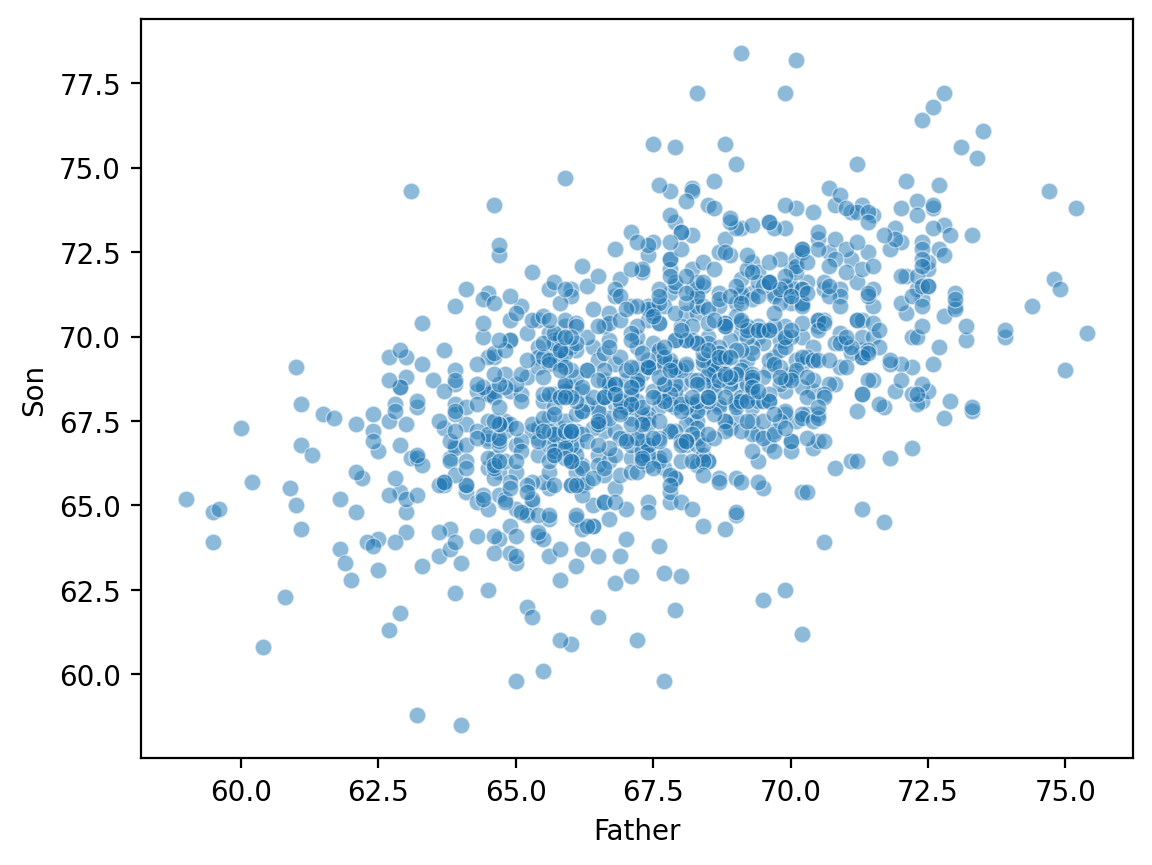

In [73]:
sns.scatterplot(data = df_height, x = "Father", y = "Son", alpha = .5);

### Wprowadzenie do korelacji liniowych

> **Współczynnik korelacji** jest liczbą z przedziału $[-1, 1]$, która opisuje związek pomiędzy parą zmiennych.

W szczególności, **współczynnik korelacji Pearsona** (lub $r$ Pearsona) opisuje (domniemaną) *liniową* zależność.

Dwie kluczowe właściwości:

- **Znak**: czy związek jest dodatni (+) czy ujemny (-).  
- **Wielkość**: siła związku liniowego.

$$
r = \frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) }{ \sqrt{ \sum_{i=1}^{n} (x_i - \bar{x})^2 } \sqrt{ \sum_{i=1}^{n} (y_i - \bar{y})^2 } }
$$

Gdzie:
- $r$ – współczynnik korelacji Pearsona
- $x_i$, $y_i$ – wartości zmiennych
- $\bar{x}$, $\bar{y}$ – średnie arytmetyczne
- $n$ – liczba obserwacji

Współczynnik korelacji Pearsona mierzy siłę i kierunek liniowej zależności między dwiema zmiennymi ciągłymi. Jego wartość zawiera się w przedziale od –1 do 1:
-	1 → idealna dodatnia korelacja liniowa
-   0 → brak korelacji liniowej
-  –1 → idealna ujemna korelacja liniowa

Współczynnik ten nie mówi o zależnościach nieliniowych i jest wrażliwy na wartości odstające.

In [74]:
ss.pearsonr(df_height['Father'], df_height['Son'])

PearsonRResult(statistic=np.float64(0.5011626808075912), pvalue=np.float64(1.2729275743661585e-69))

#### Twoja kolej

Używając `scipy.stats.pearsonr` (tutaj `ss.pearsonr`), oblicz $r$ Pearsona dla związku między `Attack` i `Defense` Pokemonów.

- Czy związek ten jest pozytywny czy negatywny?  
- Jak silny jest ten związek?

In [75]:
### Twój kod tutaj

### Ograniczenia $r$ Pearsona

- $r$ Pearsona *zakłada* liniową zależność i próbuje ilościowo określić jej siłę i kierunek.  
- Jednak wiele zależności jest **nieliniowych**!  
- Jeśli nie wizualizujemy naszych danych, poleganie wyłącznie na $r$ Pearsona może wprowadzić nas w błąd.

#### Nieliniowe dane z $r = 0$

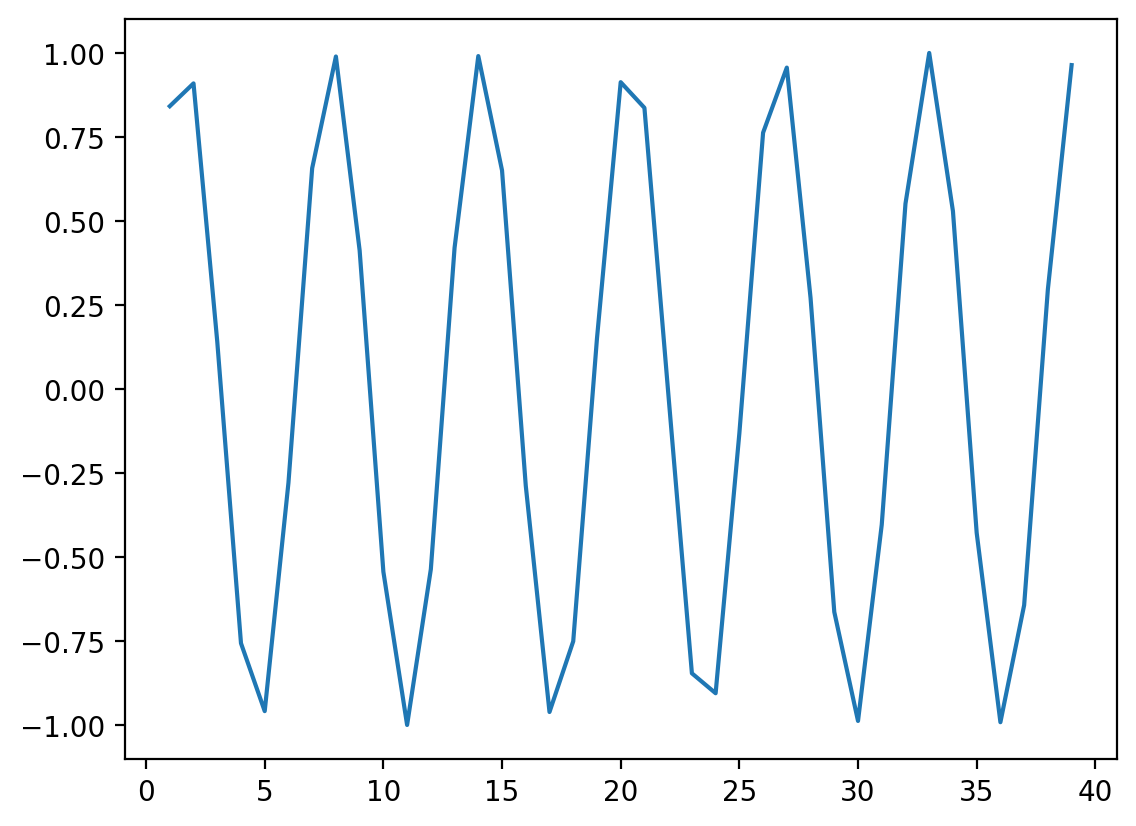

In [80]:
x = np.arange(1, 40)
y = np.sin(x)
p = sns.lineplot(x = x, y = y);

In [81]:
### r jest równe 0 mimo, ze widać zalezności!
ss.pearsonr(x, y)

PearsonRResult(statistic=np.float64(-0.04067793461845847), pvalue=np.float64(0.8057827185936635))

#### Gdy $r$ jest niezmienny względem rzeczywistej relacji

Wszystkie te zbiory danych mają w przybliżeniu ten sam **współczynnik korelacji**.

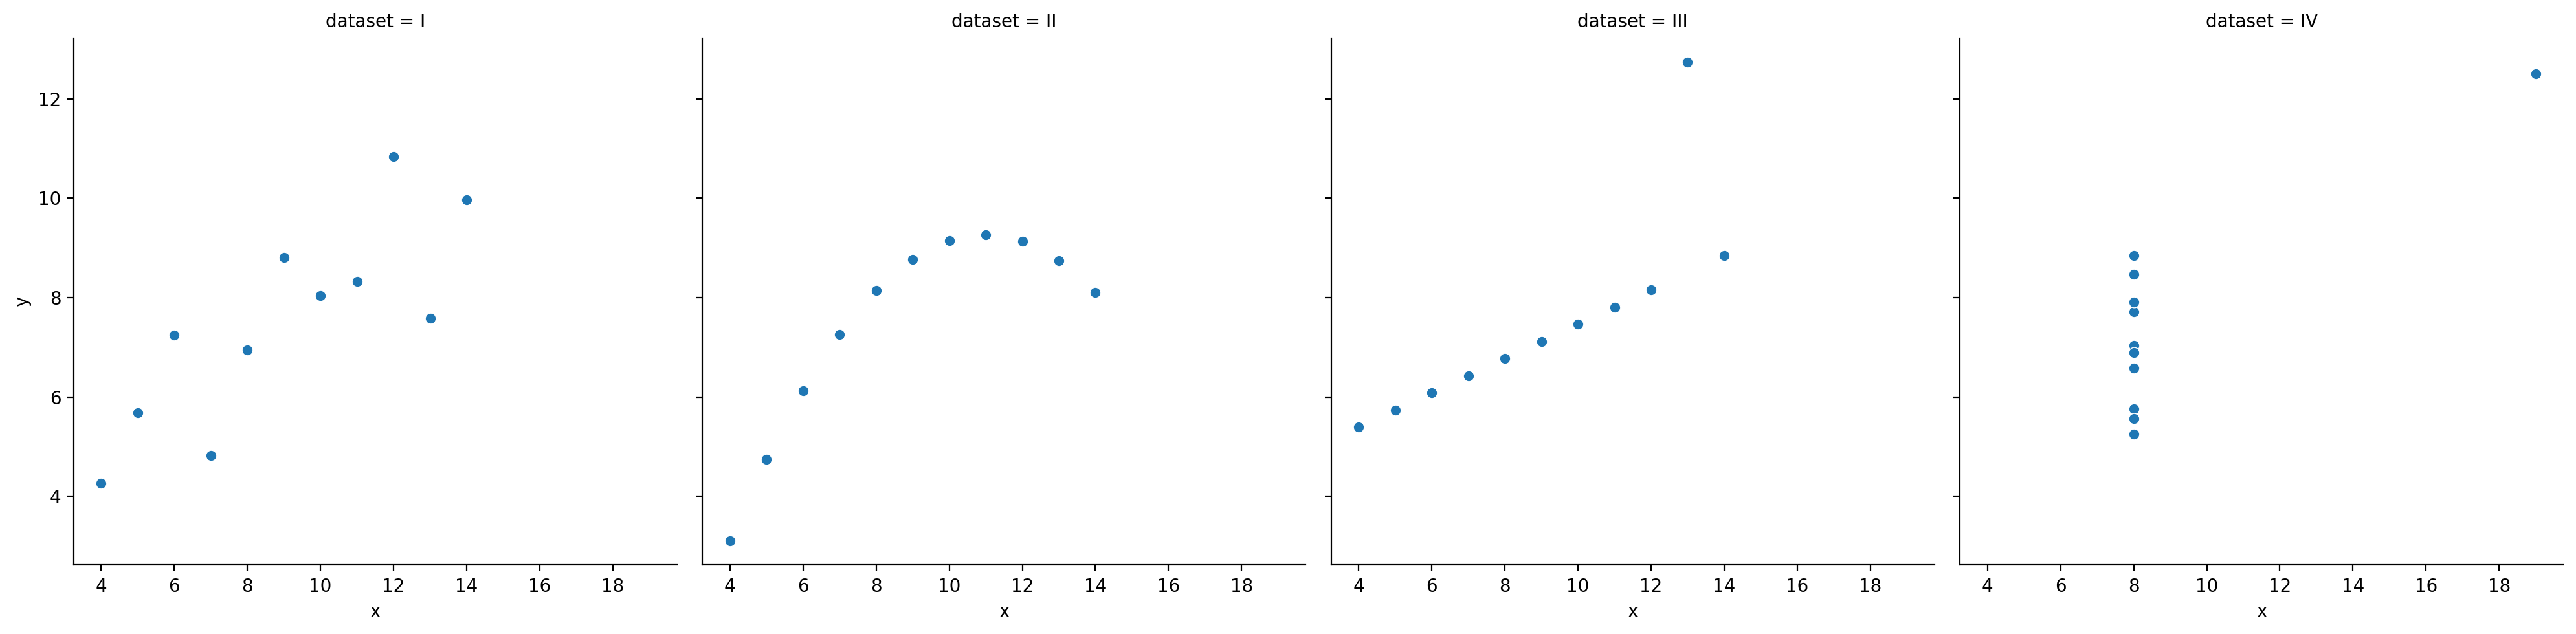

In [76]:
df_anscombe = sns.load_dataset("anscombe")
sns.relplot(data = df_anscombe, x = "x", y = "y", col = "dataset");

### Twoja kolej

Postaraj się na danych Pokemonów obliczyć zalezność między Atakiem i Obroną. Zwizualizuj zalezność na wykresie rozrzutu.

In [86]:
## Twój kod tutaj

## Korelacje rangowe

Korelacje rangowe to miary siły i kierunku monotonicznego (rosnącego lub malejącego) związku między dwiema zmiennymi. Zamiast wartości liczbowych wykorzystują rangi, czyli pozycje w uporządkowanym zbiorze.

Są mniej wrażliwe na wartości odstające i nie wymagają liniowości (tak jak korelacja Pearsona).

### Typy korelacji rangowych

1. $ρ$ (rho) **Spearmana**
- Opiera się na rangach danych.
- Wartość: od –1 do 1
- Dobrze działa dla danych związków monotonicznych, ale nieliniowych.

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

Gdzie:
- $d_i$ – różnice rang pomiędzy obserwacjami,
- $n$ – liczba obserwacji.

2. $τ$ (tau) **Kendall'a** 
- Mierzy liczbę par uporządkowanych zgodnie vs. przeciwnie.
- Bardziej konserwatywna niż Spearman – częściej daje mniejsze wartości.
- Również od –1 do 1.

$$
\tau = \frac{(C - D)}{\frac{1}{2}n(n - 1)}
$$

Gdzie:
- $τ$ — współczynnik korelacji Kendalla,
- $C$ — liczba par zgodnych (concordant pairs),
- $D$ — liczba par niezgodnych (discordant pairs),
- $n$ — liczba obserwacji,
- $\frac{1}{2}n(n - 1)$ — liczba wszystkich możliwych par obserwacji.

Co to są pary zgodne i niezgodne?
- Para zgodna (concordant): jeśli $x_i$ < $x_j$ i $y_i$ < $y_j$, lub $x_i$ > $x_j$ i $y_i$ > $y_j$
- Para niezgodna (discordant): jeśli $x_i$ < $x_j$ i $y_i$ > $y_j$, lub $x_i$ > $x_j$ i $y_i$ < $y_j$

### Kiedy stosować korelacje rangowe?
- Gdy dane nie są normalnie rozłożone.
- Gdy podejrzewasz zależność nieliniową, ale monotoniczną.
- Gdy masz rangi, np. oceny, miejsce w rankingu, poziom preferencji.

| Rodzaj korelacji | Opis                                                | Kiedy stosować                        |
|------------------|-----------------------------------------------------|----------------------------------------|
| Spearmana (ρ)     | Zależność monotoniczna, oparta na rangach          | Gdy dane są nieliniowe lub mają odstające |
| Kendalla (τ)      | Liczy proporcje par zgodnych i niezgodnych         | Gdy ważna jest odporność na wiązania  |

### Interpretacja wartości korelacji

| Zakres wartości  | Interpretacja korelacji         |
|------------------|----------------------------------|
| 0.8 – 1.0        | bardzo silna dodatnia            |
| 0.6 – 0.8        | silna dodatnia                   |
| 0.4 – 0.6        | umiarkowana dodatnia             |
| 0.2 – 0.4        | słaba dodatnia                   |
| 0.0 – 0.2        | bardzo słaba lub brak korelacji  |
| < 0              | analogicznie – korelacja ujemna  |

### Porównanie współczynników korelacji

| Właściwość               | Pearson (r)                    | Spearman (ρ)                          | Kendall (τ)                           |
|--------------------------|--------------------------------|---------------------------------------|----------------------------------------|
| Co mierzy?               | Związek liniowy                | Związek monotoniczny (na rangach)    | Związek monotoniczny (na parach)      |
| Typ danych               | Ilościowe, rozkład normalny    | Rangi lub dane porządkowe/ilościowe  | Rangi lub dane porządkowe/ilościowe   |
| Wrażliwość na odstające | Wysoka                         | Mniejsza                              | Niska                                  |
| Zakres wartości          | –1 do 1                        | –1 do 1                               | –1 do 1                                |
| Wymagana liniowość       | Tak                            | Nie                                   | Nie                                    |
| Odporność na wiązania    | Niska                          | Średnia                               | Wysoka                                 |
| Interpretacja            | Siła i kierunek związku liniowego | Siła i kierunek monotonicznego związku | Proporcja par zgodnych vs niezgodnych |
| Test istotności          | Tak (`scipy.stats.pearsonr`)   | Tak (`spearmanr`)                    | Tak (`kendalltau`)                    |

Krótkie podsumowanie:
- Pearson – najlepszy, gdy dane są normalne i zależność jest liniowa.
- Spearman – działa lepiej dla nieliniowych zależności monotonicznych.
- Kendall – bardziej konserwatywny, często używany w badaniach społecznych, mniejsza wrażliwość na małe zmiany w danych.

### Twoja kolej

Dla zbioru danych o Pokemonach znajdź takie pary zmiennych, dla których najodpowiedniejsze będzie zastosowanie po jednej z miar korelacji ilościowej. Oblicz je, a następnie zwizualizuj.

In [87]:
from scipy.stats import pearsonr, spearmanr, kendalltau

## Twój kod tutaj

## Korelacja zmiennych jakościowych

Zmienna jakościowa (kategoryczna) to taka, która przyjmuje wartości opisowe, reprezentujące kategorie — np. typ Pokémona (Fire, Water, Grass), płeć, status (Legendary vs Normal), itp.

Zmiennych takich nie można bezpośrednio analizować metodami korelacji dla liczb (Pearson, Spearman, Kendall). Zamiast tego stosuje się inne techniki.



### Tabela kontyngencji 

Tabela kontyngencji  (ang. contingency table) to specjalna tabela krzyżowa, która pokazuje liczebność (czyli liczbę przypadków) dla wszystkich możliwych kombinacji dwóch zmiennych kategorycznych.

To podstawowe narzędzie do analizy zależności pomiędzy cechami jakościowymi.

#### Test Chi-kwadrat niezależności

Test Chi-kwadrat sprawdza, czy istnieje statystycznie istotna zależność między dwiema zmiennymi kategorycznymi.

Idea:

Porównujemy:
- wartości zaobserwowane (z tabeli kontyngencji),
- z wartościami oczekiwanymi, gdyby zmienne były niezależne.

$$
\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

Gdzie:
- $O_{ij}$ – liczba zaobserwowana w komórce ($i$, $j$),
- $E_{ij}$ – liczba oczekiwana w komórce ($i$, $j$), przy założeniu niezależności.

Tabela: Przykład kontyngencji – Type 1 vs Legendary

| Type 1 | Legendary = False | Legendary = True |
|--------|-------------------|------------------|
| Fire   | 18                | 5                |
| Water  | 25                | 3                |
| Grass  | 20                | 2                |
| ...    | ...               | ...              |

**Interpretacja wyniku testu Chi-kwadrat:**

| Wartość             | Znaczenie                                        |
|---------------------|--------------------------------------------------|
| Wysoka wartość χ²   | Duża różnica między obserwacją a oczekiwaniem   |
| Niska wartość p     | Silna podstawa do odrzucenia hipotezy niezależności |
| p < 0.05            | Istotna statystycznie zależność między zmiennymi |

### Korelacje jakościowe

#### V Cramer'a

**V Cramér'a** to miara siły zależności między dwiema zmiennymi jakościowymi (kategorycznymi). Bazuje na teście Chi-kwadrat, ale wynik jest przeskalowany do zakresu 0–1, dzięki czemu łatwo interpretuje się siłę związku.


$$
V = \sqrt{ \frac{\chi^2}{n \cdot (k - 1)} }
$$

Gdzie:
- $\chi^2$ – statystyka testu chi-kwadrat,
- $n$ – liczba obserwacji,
- $k$ – mniejsza z liczby kategorii (wiersze/kolumny) w tabeli kontyngencji.

#### Współczynnik Phi ($φ$)

Zastosowanie:
- Obie zmienne muszą być dychotomiczne (np. Tak/Nie, 0/1), a więc tabela musi mieć najmniejszy rozmiar **2x2**!
- Idealny do analizy np. płeć vs czy kupił, typ vs legendary.

$$
\phi = \sqrt{ \frac{\chi^2}{n} }
$$

Gdzie:
- $\chi^2$ – statystyka testu chi-kwadrat dla tabeli 2×2,
- $n$ – liczba obserwacji.

#### T Tschuprow’a

**T Tschuprow’a** to miara zależności, która jest stosunkowo podobna do **V Cramér’a**, ale ma inną skalę. Używana głównie w przypadkach, kiedy liczba kategorii w dwóch zmiennych jest zróżnicowana. Jest to bardziej zaawansowana miara, którą można stosować w szerszym zakresie tabel kontyngencji.

$$
T = \sqrt{\frac{\chi^2}{n \cdot (k - 1)}}
$$

Gdzie:
- $\chi^2$ – statystyka testu chi-kwadrat,
- $n$ – liczba obserwacji,
- $k$ – mniejsza liczba kategorii (wiersze lub kolumny) w tabeli kontyngencji.

Zastosowanie: T Tschuprow’a jest użyteczne, gdy mamy do czynienia z tabelami kontyngencji o różnej liczbie kategorii w wierszach i kolumnach.


### Podsumowanie - korelacje jakościowe

| Miara              | Co mierzy                                               | Zastosowanie                   | Zakres wartości | Interpretacja siły |
|--------------------|---------------------------------------------------------|--------------------------------|------------------|---------------------|
| **V Cramér'a**     | Siła związku między zmiennymi nominalnymi               | Dowolne kategorie              | 0 – 1           | 0.1–słaba, 0.3–umiark., >0.5–silna |
| **Phi ($φ$)**        | Siła związku w tabeli **2×2**                              | Dwie zmienne binarne           | -1 – 1          | Podobnie jak korelacja |
| **T Tschuprow’a**  | Siła zależności, alternatywa do Cramér’s V             | Tabele o podobnej liczbie kategorii | 0 – 1      | Rzadziej używana |
| **Chi² ($χ²$)**      | Test statystyczny niezależności                         | Wszystkie zmienne kategoryczne | 0 – ∞           | Im wyższy, tym silniejsza różnica |

### Przykład 

Zbadajmy, czy typ Pokémona (type_1) jest zależny od tego, czy Pokémon jest legendarny (legendary).

Wykorzystamy bibliotekę **scipy**. 

W tej bibliotece masz już wbudowane funkcje do obliczania różnych miar korelacji jakościowych. 

In [113]:
from scipy.stats.contingency import association

# Tabela kontyngencji
ct = pd.crosstab(df_pokemon["Type 1"], df_pokemon["Legendary"])

# Obliczanie miary V Cramér'a
V = association(ct, method="cramer") # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html#association

print(f"V Cramer'a: {V}") # zinterpretuj!


V Cramer'a: 0.3361928228447545


### Twoja kolej

Jaka wizualizacja byłaby najodpowiedniejsza do przedstawienia zalezności ilościowej, rangowej, a jaka do jakościowej? 

Spróbuj na podstawie danych Pokemonów zastanowić się, jakie pary zmiennych mogłyby mieć jaki typ analizy.

---

In [114]:
## Twój kod i dyskusja tutaj

# Podsumowanie

Istnieje wiele sposobów na *opisanie naszych danych*:

- Pomiar **tendencji centralnej**.  
- Pomiar ich **zmienności**; **skośności** i **kurtozy**.
- Pomiar tego, jakie **korelacje** zachodzą między naszymi danymi.  

Wszystkie z nich są **przydatne** i wszystkie są również **eksploracyjną analizą danych** (EDA).

### Odpowiedzi testu dot. skal:
1. B  
2. C  
3. C  
4. C  
5. D